# EDA2

In [1]:
#DATA PREPROCESSING AND FEATURE ENGINEERING IN MACHINE LEARNING

# Que) Predict whether income exceeds $50K/yr based on census data. Also known as "Census Income" dataset.


# Importing Librarie

In [2]:
import numpy as np
import pandas as pd
import os
from os import path
from wordcloud import WordCloud
import pickle
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.neighbors import (KNeighborsClassifier, NeighborhoodComponentsAnalysis)
from sklearn import metrics
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, GridSearchCV, KFold
from sklearn.pipeline import Pipeline
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression as SklearnLinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.compose import ColumnTransformer

# Importing the dataset

In [3]:
df = pd.read_csv("adult_data.csv")

In [4]:
df

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


# EDA

In [8]:
print(df.shape)

(32561, 15)


In [9]:
df.head()

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


# The number of missing data points per column

In [10]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

# Dataset has missing values in "age", "occupation", "native-cou

# Data Analysis and Cleaning
How many people in dataset have income >50K or <=50K

<=50K    24720
>50K      7841
Name: income, dtype: int64


<Axes: ylabel='income'>

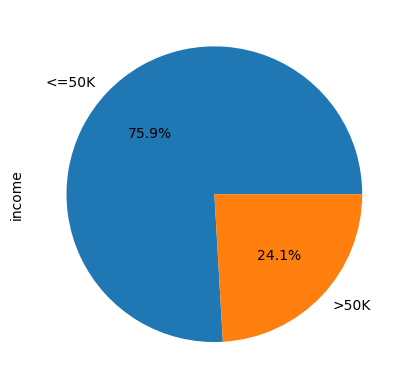

In [11]:
print(df['income'].value_counts())
df['income'].value_counts().plot.pie(autopct='%1.1f%%')

# More people earn less or equal 5OK $.

# AGE

In [12]:
def draw_distplot(column, title = ""):
    
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    ax.set_facecolor((0,0,0.10))
    sns.distplot(column)

    mean_value = column.mean()
    plt.axvline(mean_value, c='red', linewidth=1.5, label="mean")

    median_value = column.median()
    plt.axvline(median_value, c='blue', linewidth=1.5, label="median")
    plt.legend(loc='upper right', prop={'size': 20})
    plt.title(title)
    plt.show()

C:\Users\Kajal\AppData\Local\Temp\ipykernel_6296\2598772794.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)


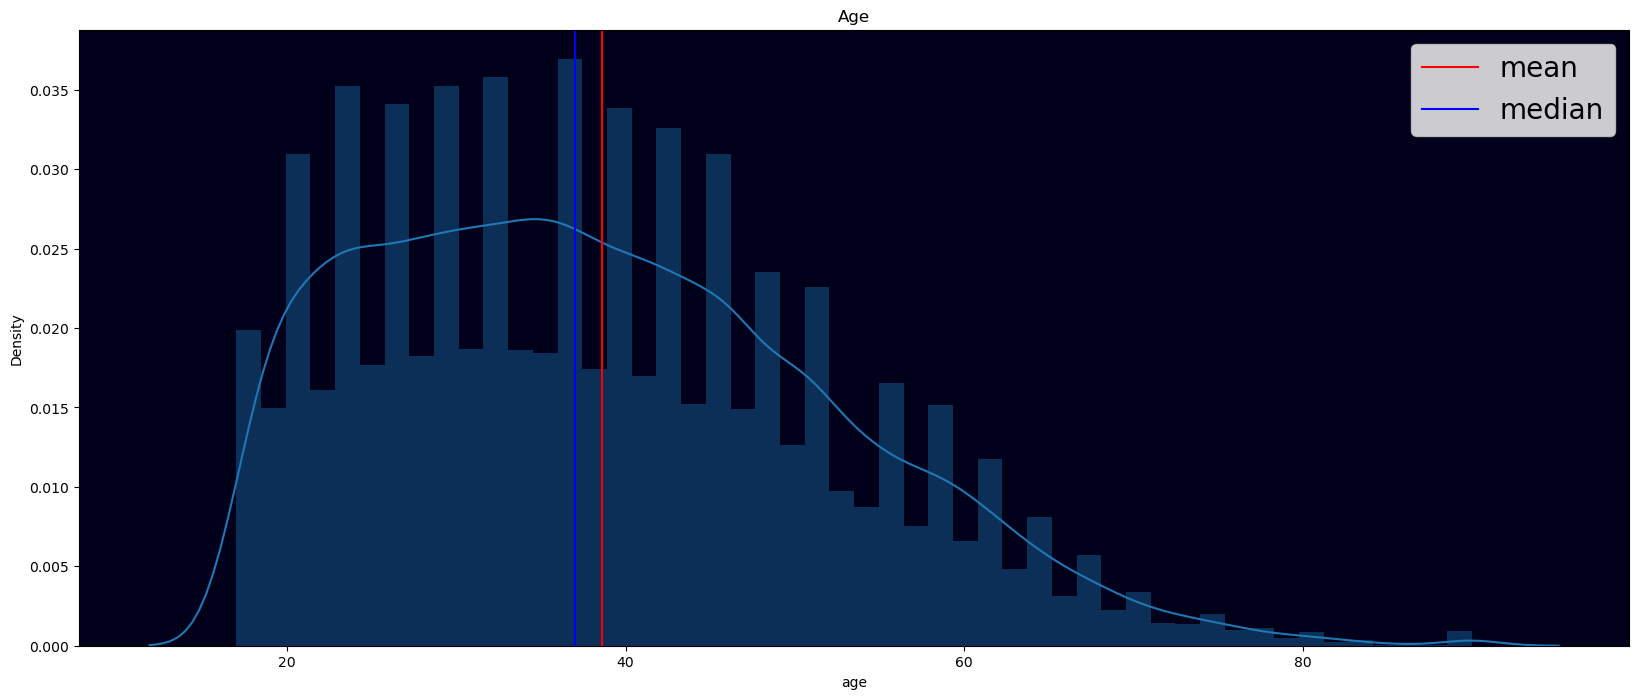

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt
draw_distplot(column=df['age'], title="Age")

In [14]:
print('precise median age for >50K income : ',df[df['income']=='>50K']['age'].median(), 'yrs')

precise median age for >50K income :  44.0 yrs


In [15]:
print('precise median age for <=50K income : ',df[df['income']=='<=50K']['age'].median(), 'yrs')

precise median age for <=50K income :  34.0 yrs


# WORKCLASS

In [16]:
def draw_countplot(countplot_x, countplot_hue, countplot_data, figsize_a=20, figsize_b=10, xticks_rotation=45):
    fig = plt.figure(figsize=(20,8))
    ax = fig.add_subplot(111)
    ax.set_facecolor((0,0,0.10))
    plt.xticks(rotation = xticks_rotation)
    plt.rc('xtick',labelsize=8)
    sns.countplot(x = countplot_x, hue = countplot_hue, data = countplot_data)
    plt.legend(prop={'size': 30})
    plt.show()

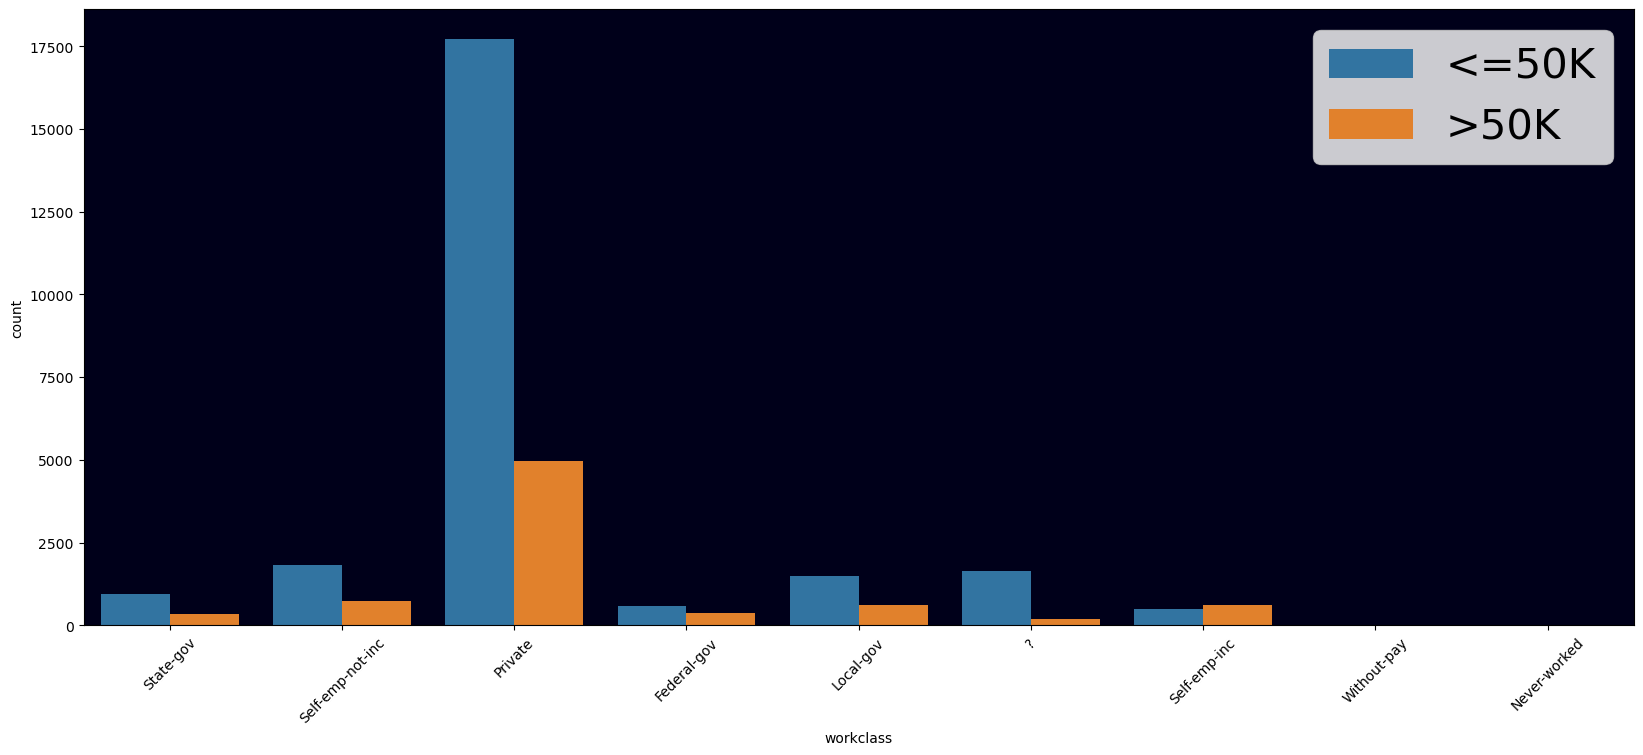

In [17]:
draw_countplot(countplot_x='workclass', countplot_hue='income', countplot_data=df)

# The two values Without-pay and Never-worked are insignificant and I can drop them.
There is missing data. How many missing data?


In [18]:
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: workclass, dtype: int64

In [19]:
df['workclass'].replace(['Never-worked', 'Without-pay', 'Federal-gov'],'Other', inplace = True)
df['workclass'].value_counts()

Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Other                 981
Name: workclass, dtype: int64

# There is plenty of missing values.

# I create Other cathegory for missing values and for cathegories with a few members.

In [20]:
pd.isnull(df["workclass"]).value_counts()

False    32561
Name: workclass, dtype: int64

In [21]:
df['workclass'].fillna('Other', inplace = True)
df['workclass'].value_counts()


Private             22696
Self-emp-not-inc     2541
Local-gov            2093
?                    1836
State-gov            1298
Self-emp-inc         1116
Other                 981
Name: workclass, dtype: int64

# FNLWGT - Final weight

# In other words, this is the number of people the census believes the entry represents.

C:\Users\Kajal\AppData\Local\Temp\ipykernel_6296\2598772794.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)


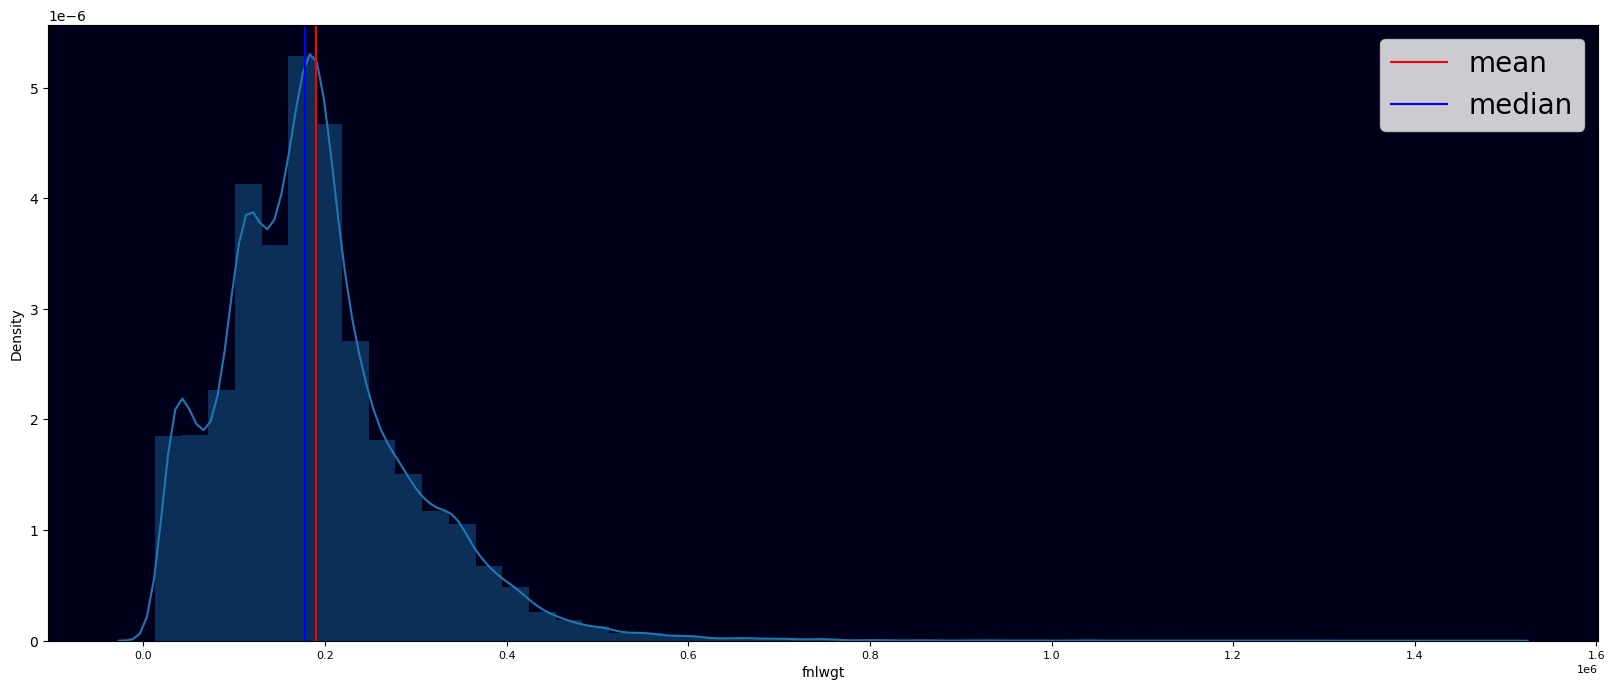

In [22]:
draw_distplot(column=df['fnlwgt'])

# This column represents nothing relevant to the futher prediction.
So I'm dropping this column:

In [23]:

df = df.drop(['fnlwgt'], axis=1)


# EDUCATION

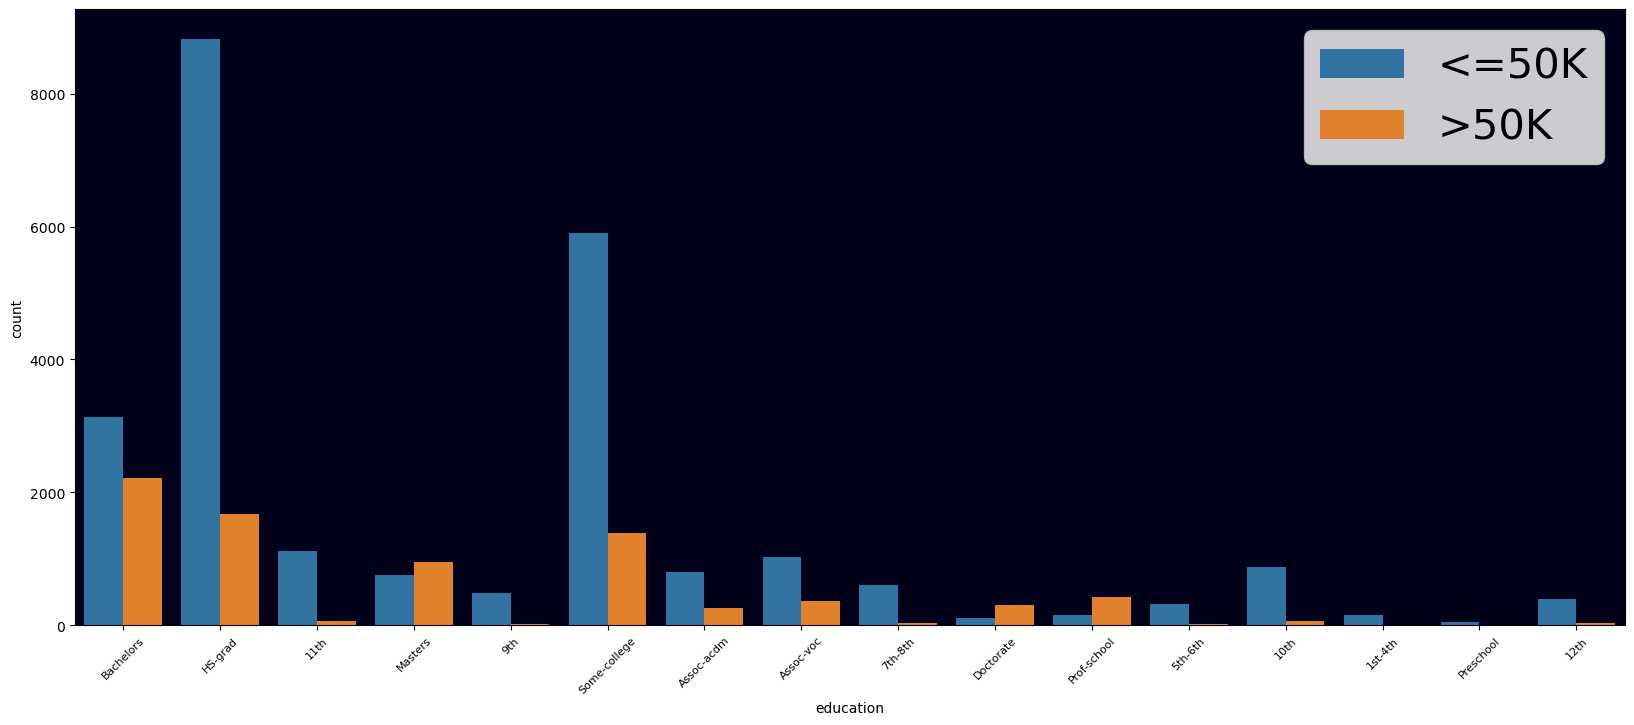

In [24]:
draw_countplot(countplot_x='education', countplot_hue='income', countplot_data=df)

# There is no missing values.

# EDUCATION-NUM

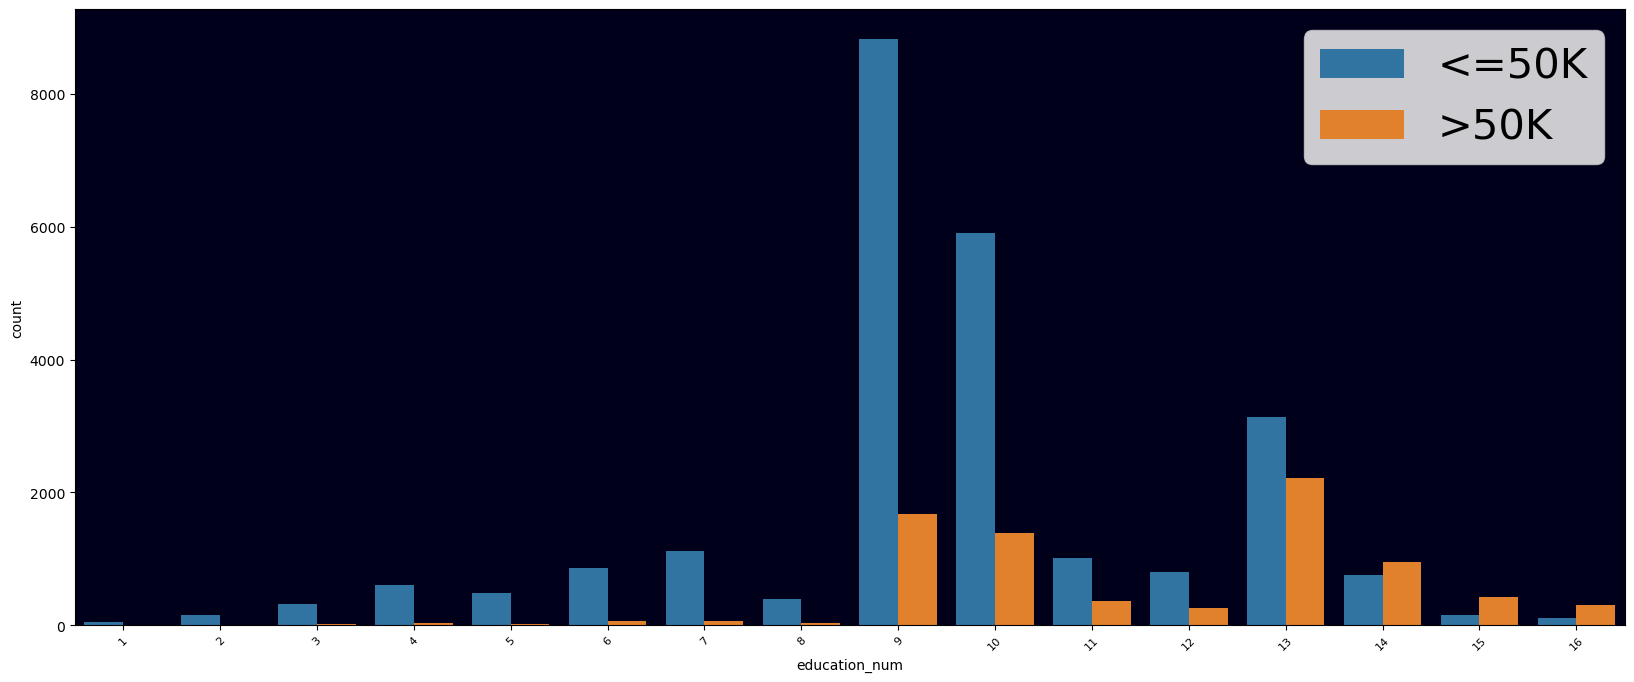

In [25]:
draw_countplot(countplot_x='education_num', countplot_hue='income', countplot_data=df)

# There is no missng values.
Values aren't linear. Values are categorical.

In [26]:
education_var = df['education'].unique()
for edu_var in education_var:
    print("For {}, the Education Number is {}"
          .format(edu_var, df[df['education'] == edu_var]['education_num'].unique()))

For Bachelors, the Education Number is [13]
For HS-grad, the Education Number is [9]
For 11th, the Education Number is [7]
For Masters, the Education Number is [14]
For 9th, the Education Number is [5]
For Some-college, the Education Number is [10]
For Assoc-acdm, the Education Number is [12]
For Assoc-voc, the Education Number is [11]
For 7th-8th, the Education Number is [4]
For Doctorate, the Education Number is [16]
For Prof-school, the Education Number is [15]
For 5th-6th, the Education Number is [3]
For 10th, the Education Number is [6]
For 1st-4th, the Education Number is [2]
For Preschool, the Education Number is [1]
For 12th, the Education Number is [8]


# I see that Education Number and Education are just the same, so, Education of them column could be droped.

In [27]:
df.drop(['education'], axis = 1, inplace = True)

In [28]:

df['education_num'].value_counts()

9     10501
10     7291
13     5355
14     1723
11     1382
7      1175
12     1067
6       933
4       646
15      576
5       514
8       433
16      413
3       333
2       168
1        51
Name: education_num, dtype: int64

# MARITAL-STATUS

In [29]:
df['marital_status'].value_counts()

Married-civ-spouse       14976
Never-married            10683
Divorced                  4443
Separated                 1025
Widowed                    993
Married-spouse-absent      418
Married-AF-spouse           23
Name: marital_status, dtype: int64

# There is no missing values

# OCCUPATION

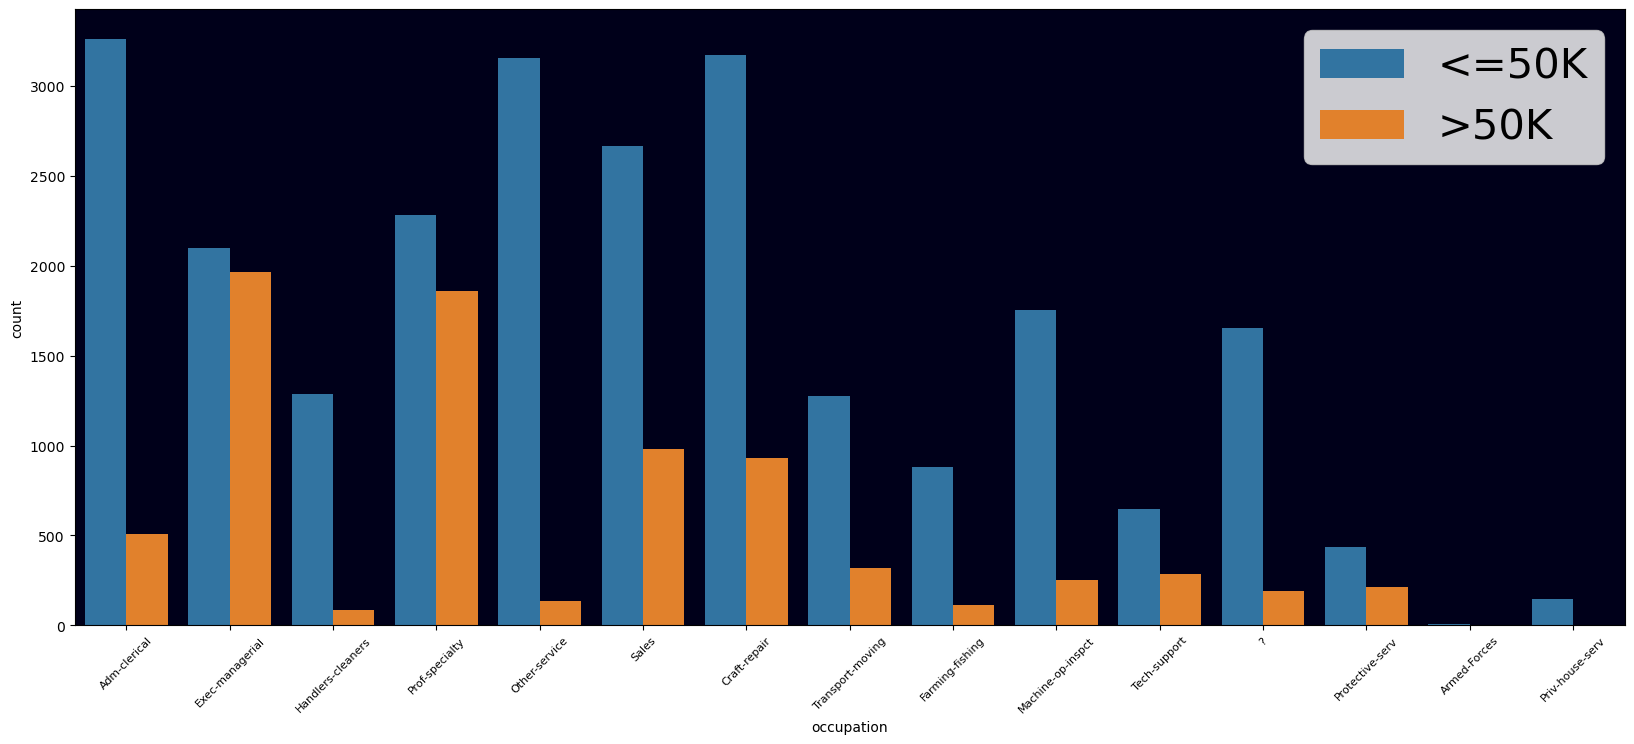

In [30]:
draw_countplot(countplot_x='occupation', countplot_hue='income', countplot_data=df)

In [31]:
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

# Do the data have missing values ?.
All variables are unique.

In [32]:
# creating bool series True for NaN values
bool_series = pd.isnull(df["occupation"])
# filtering data
print("displaying data only with team = NaN")
df[bool_series]

displaying data only with team = NaN


,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income


In [33]:
df

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [34]:
#The data have missing values
#How many of them?
bool_series.value_counts()

False    32561
Name: occupation, dtype: int64

In [35]:
f'Missing values about Occupation is {(df["occupation"].isnull().sum()/(df["occupation"].count()+df["occupation"].isnull().sum())):2.2%} of all data'

'Missing values about Occupation is 0.00% of all data'

# I'll create Other variable for missing values.

In [36]:
df['occupation'].fillna('Other', inplace = True)
df['occupation'].value_counts()

Prof-specialty       4140
Craft-repair         4099
Exec-managerial      4066
Adm-clerical         3770
Sales                3650
Other-service        3295
Machine-op-inspct    2002
?                    1843
Transport-moving     1597
Handlers-cleaners    1370
Farming-fishing       994
Tech-support          928
Protective-serv       649
Priv-house-serv       149
Armed-Forces            9
Name: occupation, dtype: int64

# RELATIONSHIP

In [37]:
df['relationship'].value_counts()

Husband           13193
Not-in-family      8305
Own-child          5068
Unmarried          3446
Wife               1568
Other-relative      981
Name: relationship, dtype: int64

In [38]:
pd.isnull(df["relationship"]).value_counts()

False    32561
Name: relationship, dtype: int64

# There is no missing values.
Two columns Relationship and Marital Status carry similar information. But no the same so I leave both columns.

# RACE

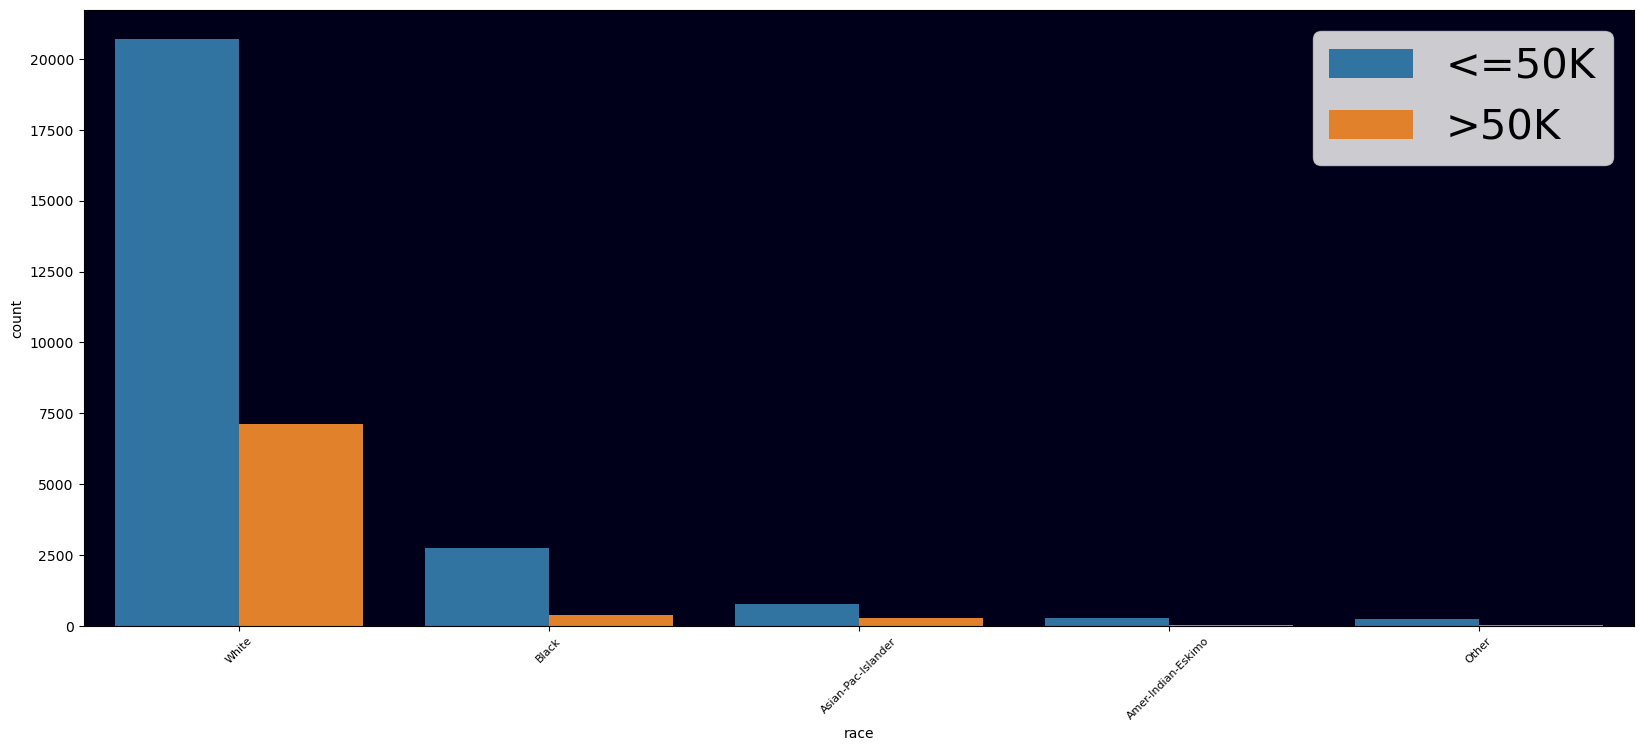

In [39]:
draw_countplot(countplot_x='race', countplot_hue='income', countplot_data=df)

In [40]:
df['race'].replace(['Asian-Pac-Islander', 'Amer-Indian-Eskimo', 'Other'],'Other', inplace = True)
df['race'].value_counts()

White    27816
Black     3124
Other     1621
Name: race, dtype: int64

# The vast majority of people included in this dataset are of the White race.
I can sum no White and no Black races to one variable.

# SEX

sex     income
Female  <=50K      9592
        >50K       1179
Male    <=50K     15128
        >50K       6662
Name: income, dtype: int64
------------------------------------------------


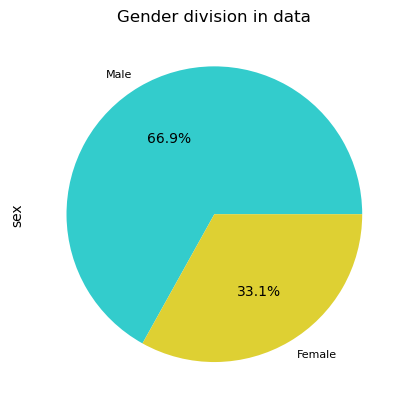

<Figure size 1000x600 with 0 Axes>

------------------------------------------------


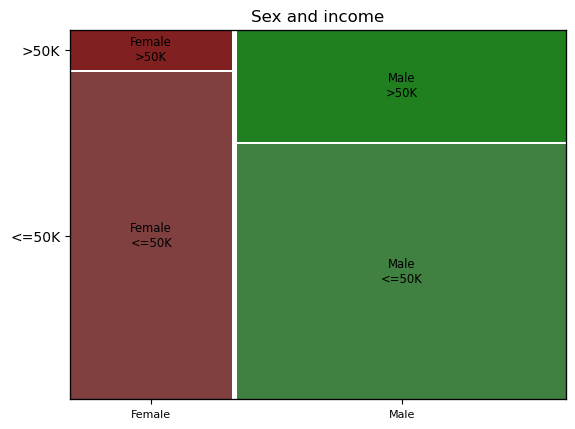

In [41]:
from statsmodels.graphics.mosaicplot import mosaic
sex_income = pd.DataFrame({'sex': df['sex'], 'income': df['income']})
data = sex_income.income.groupby([sex_income.sex,  sex_income.income]).size()
plt.title('Gender division in data')
print(data)
print('------------------------------------------------')
df['sex'].value_counts().plot.pie(autopct='%1.1f%%', colors=['#33cccc','#ded033'])
plt.figure(figsize=(10,6))
plt.show()
print('------------------------------------------------')
mosaic(data, gap=0.01, title = "Sex and income")
plt.show()

# There are more Male participants than Female participants.
More percentage of Male have an Income of more than 50K$ than Females.

# CAPITAL-GAIN and CAPITAL-LOSS

# Capital gain - a profit that is made by selling property or an investment
Capital loss - a loss as a result of the sale of an asset

C:\Users\Kajal\AppData\Local\Temp\ipykernel_6296\2598772794.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)


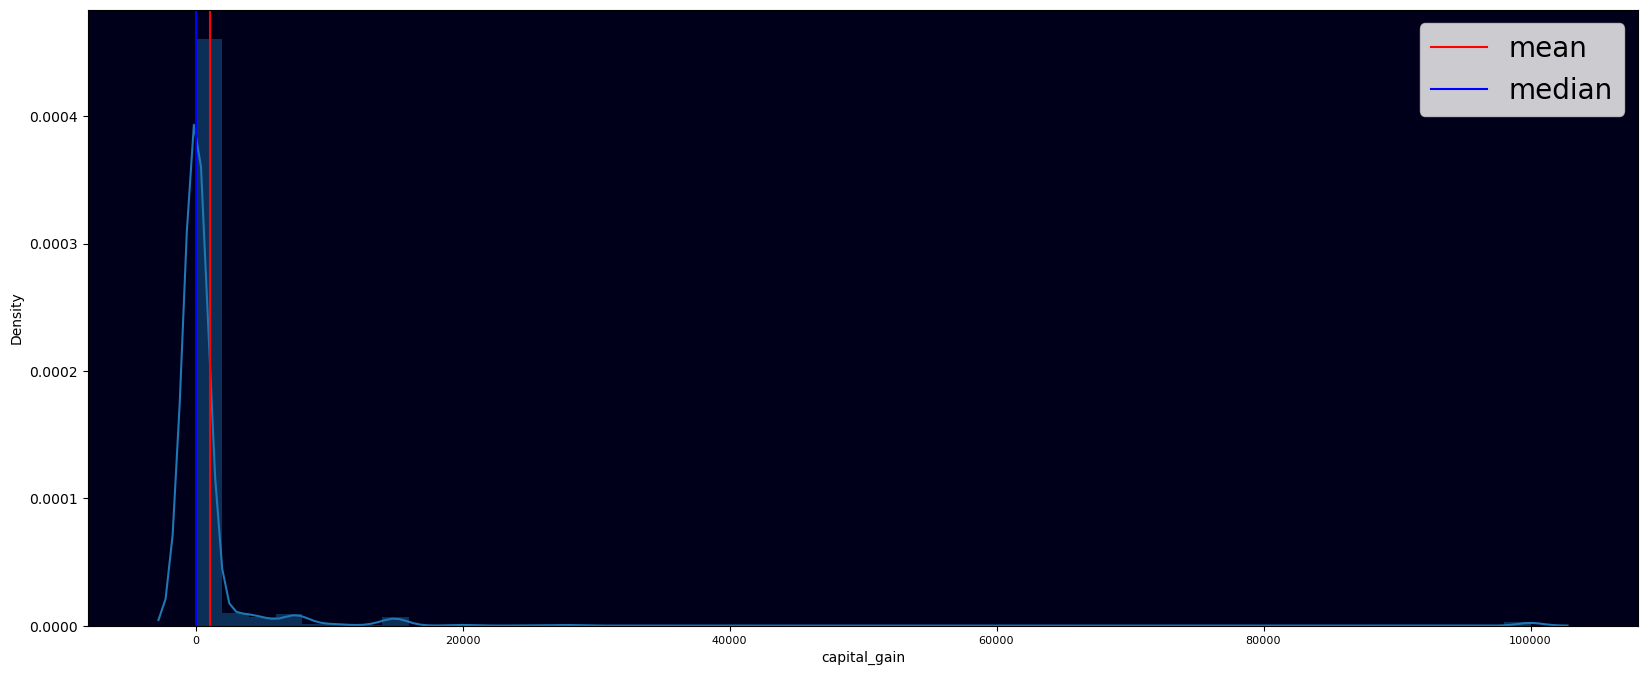

In [42]:
draw_distplot(column=df['capital_gain'])

In [43]:
print(df['capital_gain'].value_counts())

0        29849
15024      347
7688       284
7298       246
99999      159
         ...  
1111         1
2538         1
22040        1
4931         1
5060         1
Name: capital_gain, Length: 119, dtype: int64


C:\Users\Kajal\AppData\Local\Temp\ipykernel_6296\2598772794.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)


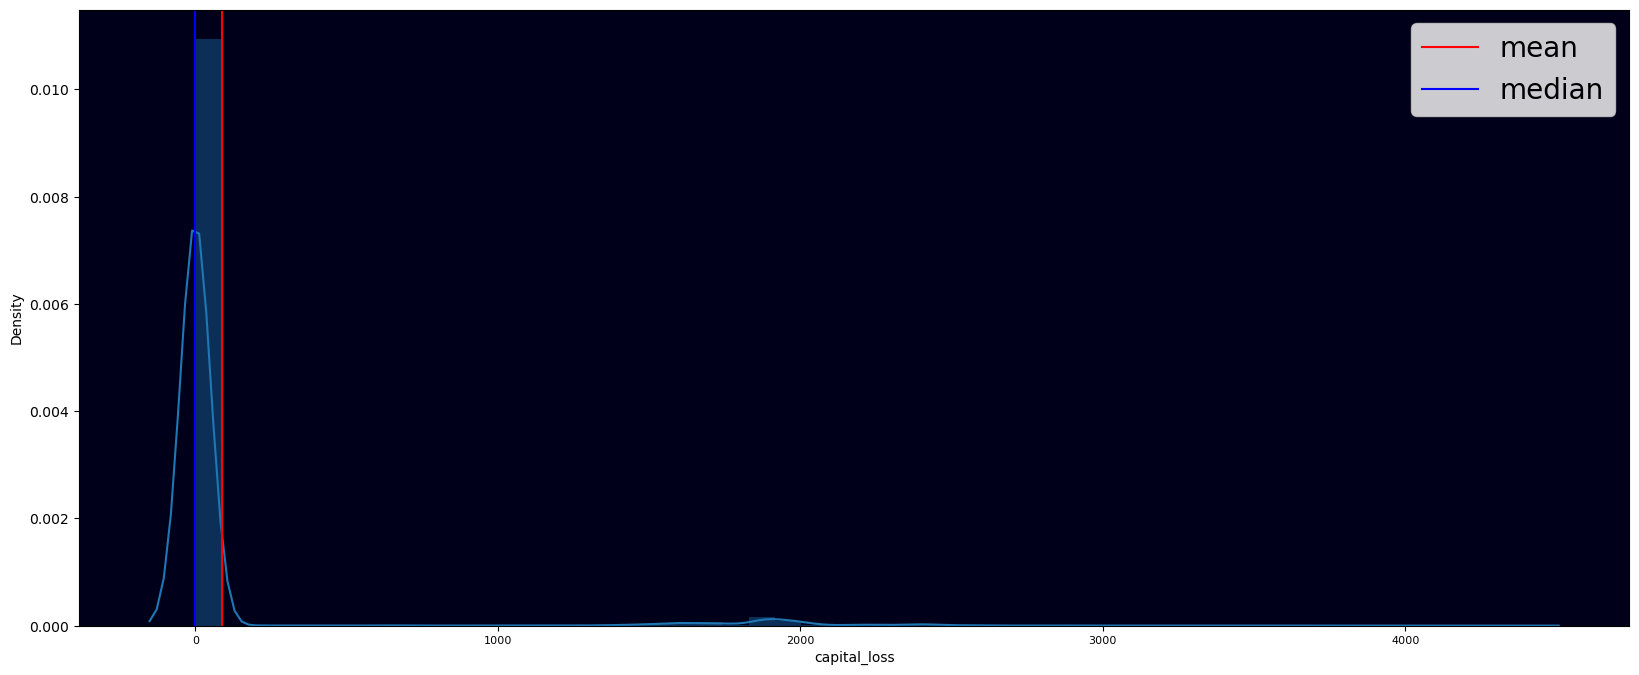

In [44]:
draw_distplot(column=df['capital_loss'])

In [45]:
print(df['capital_loss'].value_counts())

0       31042
1902      202
1977      168
1887      159
1848       51
        ...  
2080        1
1539        1
1844        1
2489        1
1411        1
Name: capital_loss, Length: 92, dtype: int64


# HOURS-PER-WEEK

C:\Users\Kajal\AppData\Local\Temp\ipykernel_6296\2598772794.py:6: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(column)


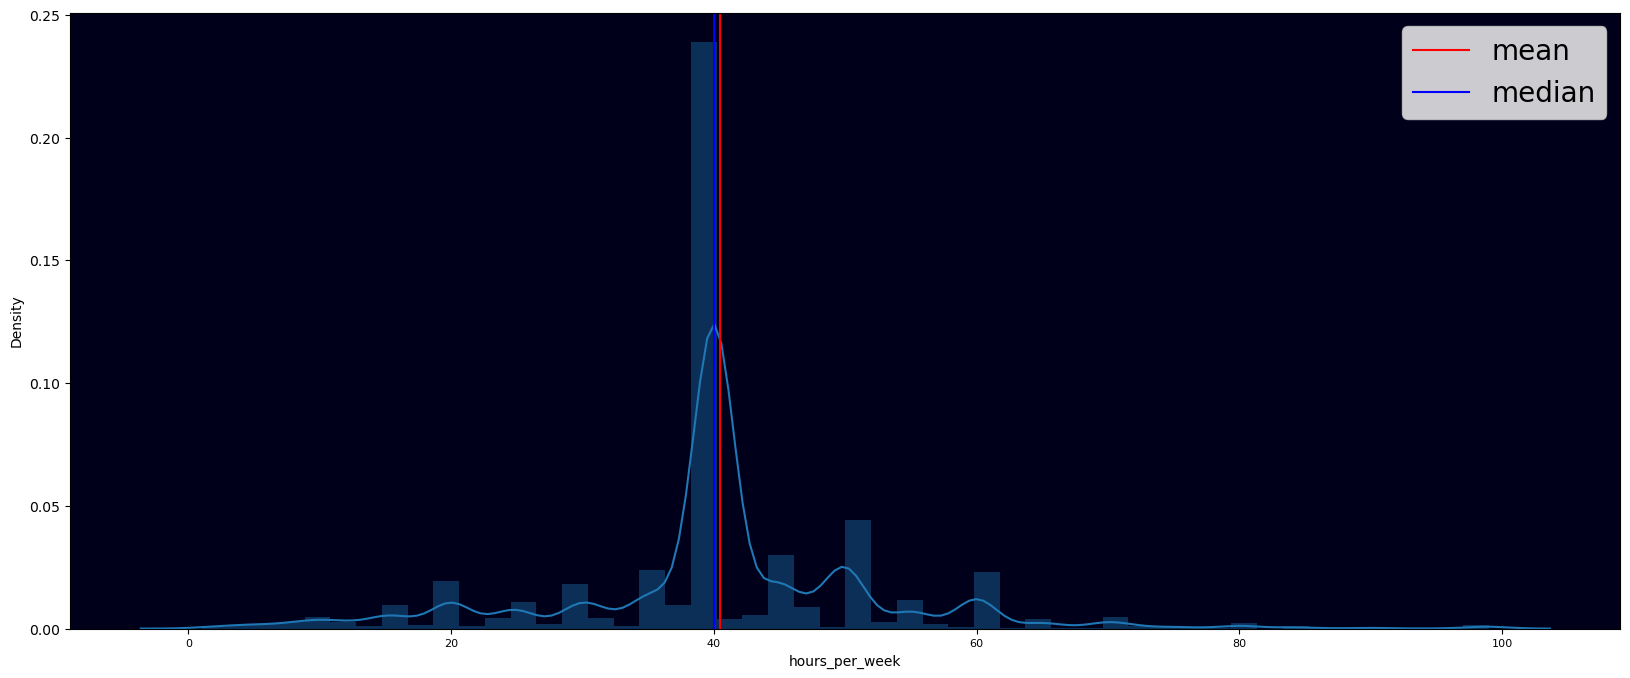

In [46]:
draw_distplot(column=df['hours_per_week'])

# Most people work about 40h/week, but data is in range of 0 100

# NATIVE COUNTRIES

In [47]:
print(df['native_country'].value_counts())

United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
France                      

Text(0.5, 1.0, 'Total adults from each Country')

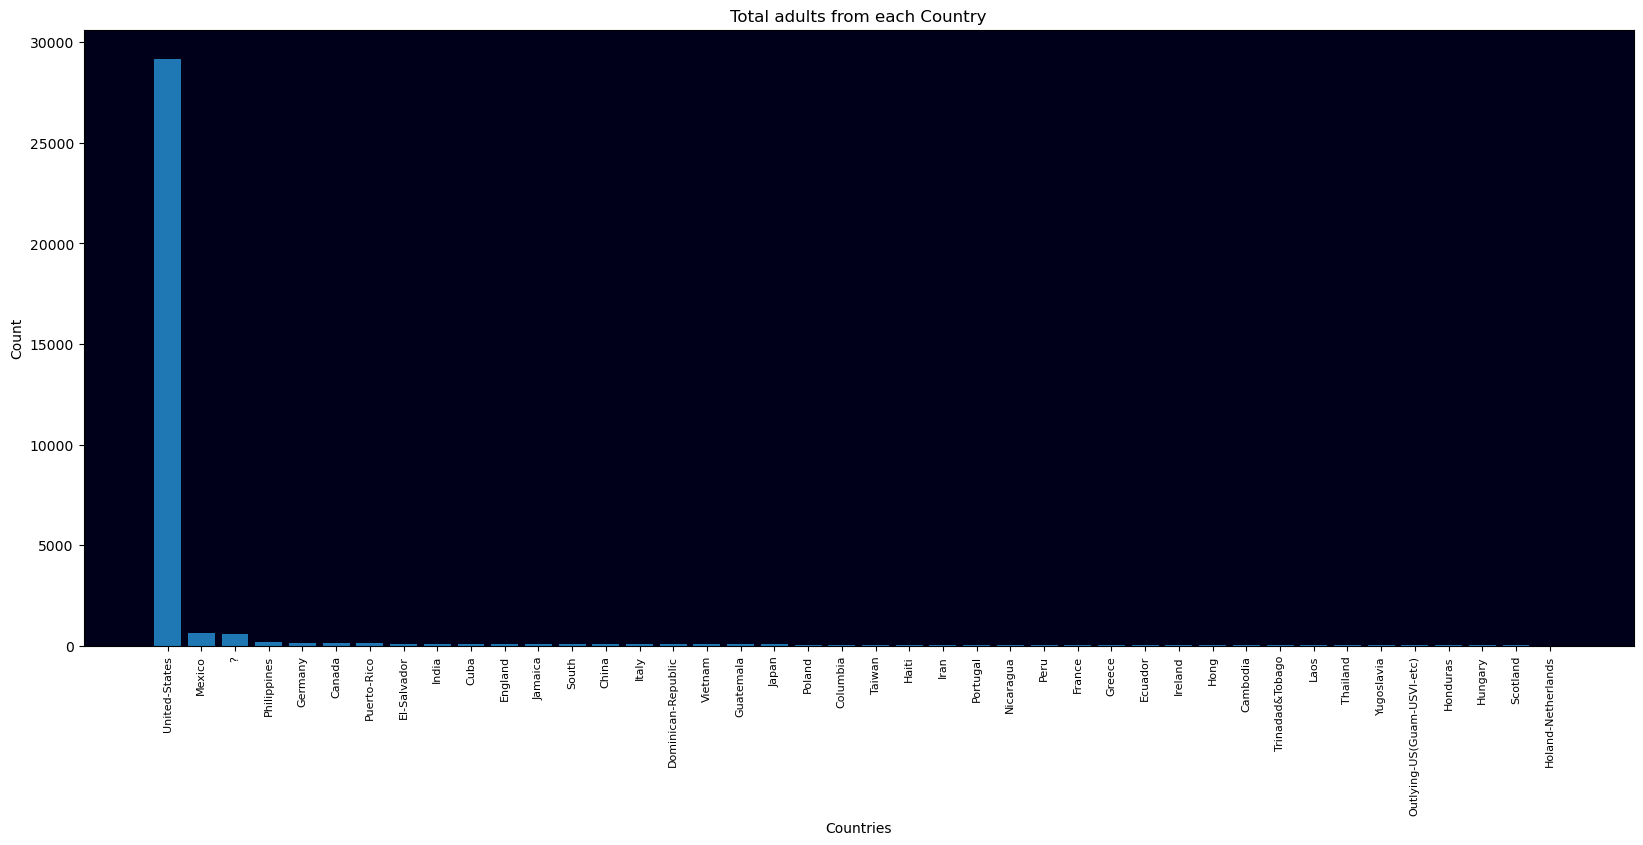

In [48]:
country_count = df['native_country'].value_counts()
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
plt.bar(country_count.index, country_count.values)
plt.xticks(rotation = 90)
plt.xlabel('Countries')
plt.ylabel('Count')
plt.title('Total adults from each Country')

# There is "?" category, which appears to be error.
The majority of people are from United States so for the rest I'll create Other variable.

<Axes: xlabel='count', ylabel='native_country'>

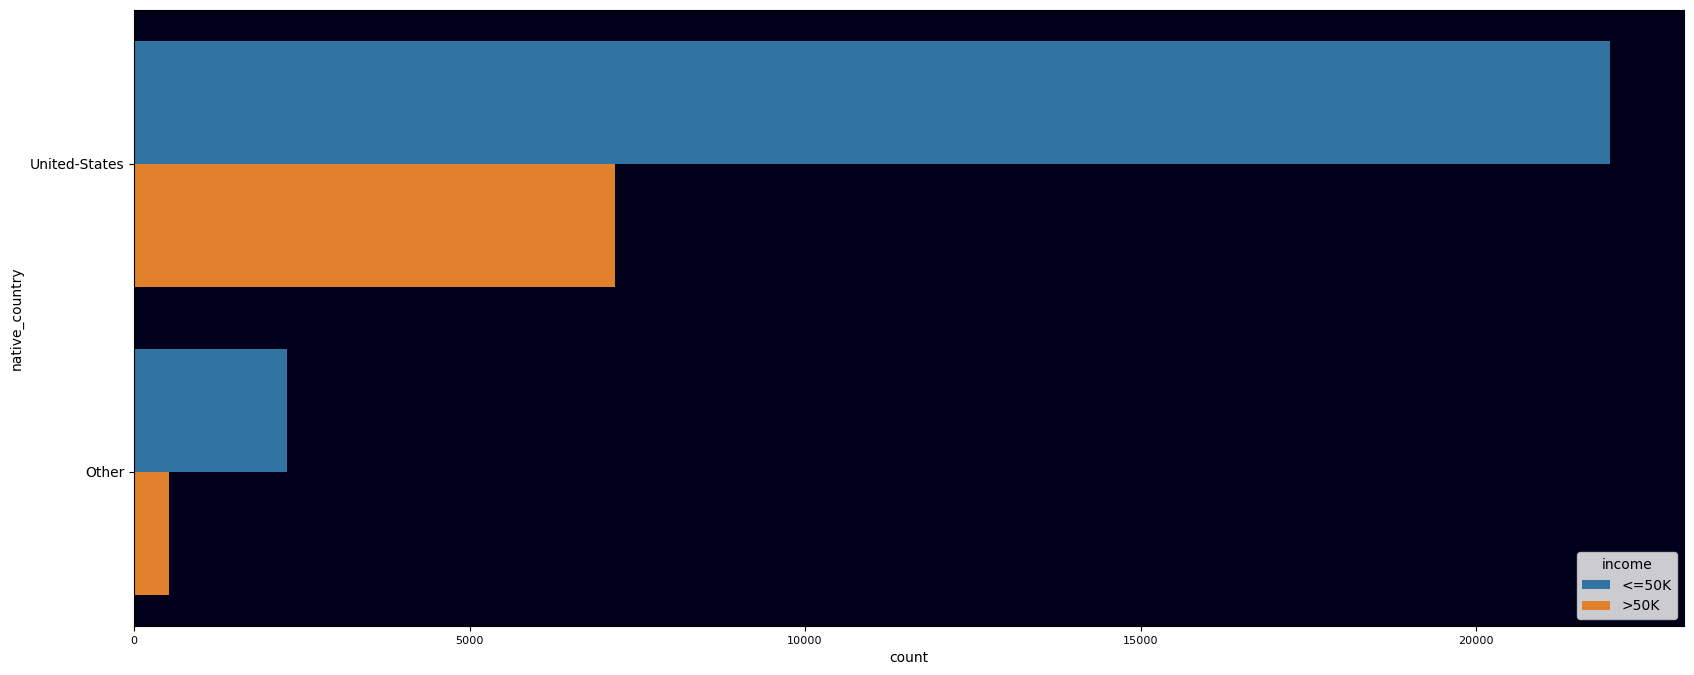

In [49]:
df = df.drop(df[df['native_country'] == '?'].index)
fig = plt.figure(figsize=(20,8))
ax = fig.add_subplot(111)
ax.set_facecolor((0,0,0.10))
countries = np.array(df['native_country'].unique())
countries = np.delete(countries, 0)
df['native_country'].replace(countries, 'Other', inplace = True)
sns.countplot(y = 'native_country', hue = 'income', data = df)

# Adding target column with 0/1 values
0 when INCOME <=50K
1 when INCOME >50

In [50]:
df['target'] = df['income']
df['target'] = np.where(df['income'].isin(['>50K']), 1, 0)

In [51]:
missing_values_income = df['income'].isnull().sum()
print("Missing values in INCOME column ", missing_values_income)

Missing values in INCOME column  0


# No missing values in INCOME column

Correlation matrix to identify their relation with income.

C:\Users\Kajal\AppData\Local\Temp\ipykernel_6296\3103141648.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmax=.9, square=True, annot=True, fmt='.1f', center=0)


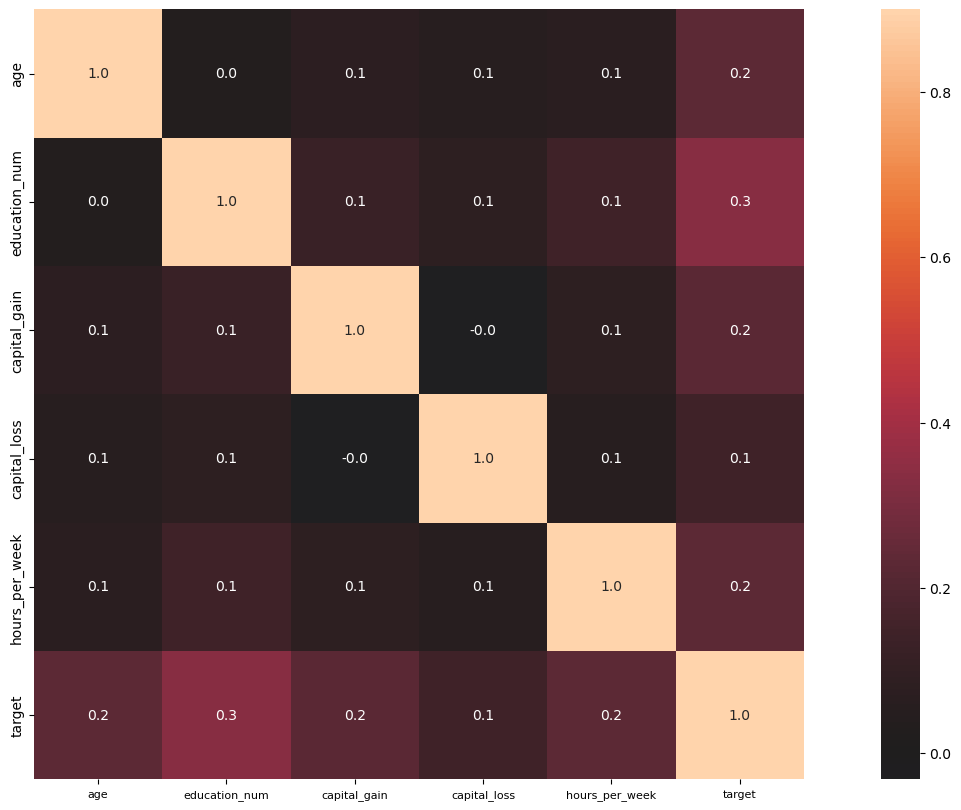

In [52]:
plt.subplots(figsize=(20, 10))
sns.heatmap(df.corr(), vmax=.9, square=True, annot=True, fmt='.1f', center=0)
plt.show()

# It’s clear that there is no high linear correlation between any of the continuous features and the target variable.

I'll drop Income column, beacuse there is 0/1 Target column

In [53]:
df = df.drop(columns=['income'])

# Dataset after all changes

In [54]:
df.head()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
0,39,State-gov,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,0
1,50,Self-emp-not-inc,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,0
2,38,Private,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,0
3,53,Private,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,0
4,28,Private,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Other,0


In [55]:
df.isnull().sum()

age               0
workclass         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
target            0
dtype: int64

# One Hot Encoding

In [56]:
target = 'target'
num_features = ['age', 'capital-gain', 'capital-loss', 'hours-per-week', 'education-num']
cat_features = ['workclass', 'marital-status', 'occupation', 'relationship', 'race', 'sex', 'native-country']

In [57]:
from sklearn.preprocessing import OneHotEncoder as SklearnOneHotEncoder

In [58]:
class OneHotEncoder(SklearnOneHotEncoder):
    def __init__(self, **kwargs):
        super(OneHotEncoder, self).__init__(**kwargs)
        self.fit_flag = False

    def fit(self, X, **kwargs):
        out = super().fit(X)
        self.fit_flag = True
        return out

    def transform(self, X, **kwargs):
        sparse_matrix = super(OneHotEncoder, self).transform(X)
        new_columns = self.get_new_columns(X = X)
        d_out = pd.DataFrame(sparse_matrix.toarray(), columns = new_columns, index = X.index)
        return d_out

    def fit_transform(self, X, **kwargs):
        self.fit(X)
        return self.transform(X)

    def get_new_columns(self, X):
        new_columns = []
        for i, column in enumerate(X.columns):
            j = 0
            while j < len(self.categories_[i]):
                new_columns.append(f'{column}_{self.categories_[i][j]}')
                j += 1
        return new_columns

In [59]:
features = df.columns.tolist()
features.remove(target)
X = df[features]

y = df[target]

In [60]:
 def ConfusionMatrix(classifier, X=X, y=y, confusionMatrix = True, plotConfusionMatrix = True):
        '''ConfusionMatrix function split data, fit data to model and give 
        a prediction for a given model and data. After that draw Confusion Matrix or 
        Plot Confusion Matrix to show the score'''
        
        #split dataset into train and test data
        X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1, 
                                                            stratify=y)

        # Fit the classifier to the data
        classifier.fit(X_train, y_train)
        y_pred = classifier.predict(X_test)

        #computing the confusion matrix with each row corresponding to the true class
        if(confusionMatrix):
            print(confusion_matrix(y_test, y_pred))

        #drawing Plot Confusion Matrix
        if(plotConfusionMatrix):
            plot_confusion_matrix(classifier, X_test, y_test)  
            plt.show() 

In [61]:
def GridSearch(param, estimator, X=X, y=y):
    # split into a training and testing set
    X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

    grid_rf = GridSearchCV(estimator, param, refit = True, verbose = 3, n_jobs=-1) 

    # fitting the model for grid search 
    grid_rf.fit(X_train, y_train) 

    # print best parameter after tuning 
    print(grid_rf.best_params_) 
    grid_rf_predictions = grid_rf.predict(X_test) 

    # print classification report 
    print(classification_report(y_test, grid_rf_predictions))

In [62]:
def CVmodel(nFolds = 5, randomState=2020, features=features, lin_reg = False, lin_reg_without_fi = False,
            cutoff=0.5, debug= False, model = SVC(), df = df, pipeline = False):
    
    kf = KFold(n_splits=nFolds, shuffle=True, random_state=randomState)
    
    # predictions for individual folds
    predictions = []

    # the index in the original file
    indices = []
    true=[]
    
    if lin_reg:
        for train, test in kf.split(df.index.values):
            if debug:
                print(model)
            model.fit(df.iloc[train][features], df.iloc[train][target])

            # predsTrain = model.predict_proba(df.iloc[train][features])[:,1]
            # preds = model.predict_proba(df.iloc[test][features])[:,1]
            preds, y_test = model.predict(df.iloc[test][features], round(cutoff,1))
            
            # information about predictions for this fold
            predictions.append(preds.tolist().copy())
            # indexed in the original data frame
            indices.append(df.iloc[test].index.tolist().copy())
            
            true = (df.iloc[test][target]==1)
            if(lin_reg_without_fi == False):
                feature_importance = model.coef_
        if(lin_reg_without_fi):
            return predictions, indices, true
            
        return predictions, indices, feature_importance, true
        
        
    if(pipeline):
        for train, test in kf.split(df.index.values):
            if debug:
                print(model)
            model.fit(df.iloc[train][features], df.iloc[train][target])

            # predsTrain = model.predict_proba(df.iloc[train][features])[:,1]
            preds = model.predict_proba(df.iloc[test][features])[:,1]

            # information about predictions for this fold
            predictions.append(preds.tolist().copy())

            # indexed in the original data frame
            indices.append(df.iloc[test].index.tolist().copy())
        
        return predictions, indices, true
        
    for train, test in kf.split(df.index.values):
        if debug:
            print(model)
        model.fit(df.iloc[train][features], df.iloc[train][target])

        # predsTrain = model.predict_proba(df.iloc[train][features])[:,1]
        preds = model.predict_proba(df.iloc[test][features])[:,1]

        # information about predictions for this fold
        predictions.append(preds.tolist().copy())

        # indexed in the original data frame
        indices.append(df.iloc[test].index.tolist().copy())

        true.append(df.iloc[test][target]==1)

        feature_importance = model.feature_importances_
        
    return predictions, indices, feature_importance, true

In [63]:
# Importing Necessary Libraries
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [64]:
adult_df = pd.read_csv('adult.csv')
print("Number of Observations in adult dataset:", adult_df.shape)

adult_df.head()


Number of Observations in adult dataset: (32561, 15)


,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [65]:
adult_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB


In [66]:
adult_df.describe()

,age,fnlwgt,education.num,capital.gain,capital.loss,hours.per.week
count,32561.000000,3.256100e+04,32561.000000,32561.000000,32561.000000,32561.000000
mean,38.581647,1.897784e+05,10.080679,1077.648844,87.303830,40.437456
std,13.640433,1.055500e+05,2.572720,7385.292085,402.960219,12.347429
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.178270e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.783560e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.370510e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.484705e+06,16.000000,99999.000000,4356.000000,99.000000


In [67]:
edit_cols = ['native.country','occupation','workclass']
# Replace ? with Unknown
for col in edit_cols:
    adult_df.loc[adult_df[col] == '?', col] = 'unknown'

In [68]:
# Check if ? is present
for col in edit_cols:
    print(f"? in {col}: {adult_df[(adult_df[col] == '?')].any().sum()}")

? in native.country: 0
? in occupation: 0
? in workclass: 0


In [69]:
hs_grad = ['HS-grad','11th','10th','9th','12th']
elementary = ['1st-4th','5th-6th','7th-8th']

# replace elements in list.
adult_df['education'].replace(to_replace = hs_grad,value = 'HS-grad',inplace = True)
adult_df['education'].replace(to_replace = elementary,value = 'elementary_school',inplace = True)

adult_df['education'].value_counts()

HS-grad              13556
Some-college          7291
Bachelors             5355
Masters               1723
Assoc-voc             1382
elementary_school     1147
Assoc-acdm            1067
Prof-school            576
Doctorate              413
Preschool               51
Name: education, dtype: int64

In [70]:
married= ['Married-spouse-absent','Married-civ-spouse','Married-AF-spouse']
separated = ['Separated','Divorced']

#replace elements in list.
adult_df['marital.status'].replace(to_replace = married ,value = 'Married',inplace = True)
adult_df['marital.status'].replace(to_replace = separated,value = 'Separated',inplace = True)

adult_df['marital.status'].value_counts()

Married          15417
Never-married    10683
Separated         5468
Widowed            993
Name: marital.status, dtype: int64

In [71]:
self_employed = ['Self-emp-not-inc','Self-emp-inc']
govt_employees = ['Local-gov','State-gov','Federal-gov']

#replace elements in list.
adult_df['workclass'].replace(to_replace = self_employed ,value = 'Self_employed',inplace = True)
adult_df['workclass'].replace(to_replace = govt_employees,value = 'Govt_employees',inplace = True)

adult_df['workclass'].value_counts()


Private           22696
Govt_employees     4351
Self_employed      3657
unknown            1836
Without-pay          14
Never-worked          7
Name: workclass, dtype: int64

# DECISION TREE

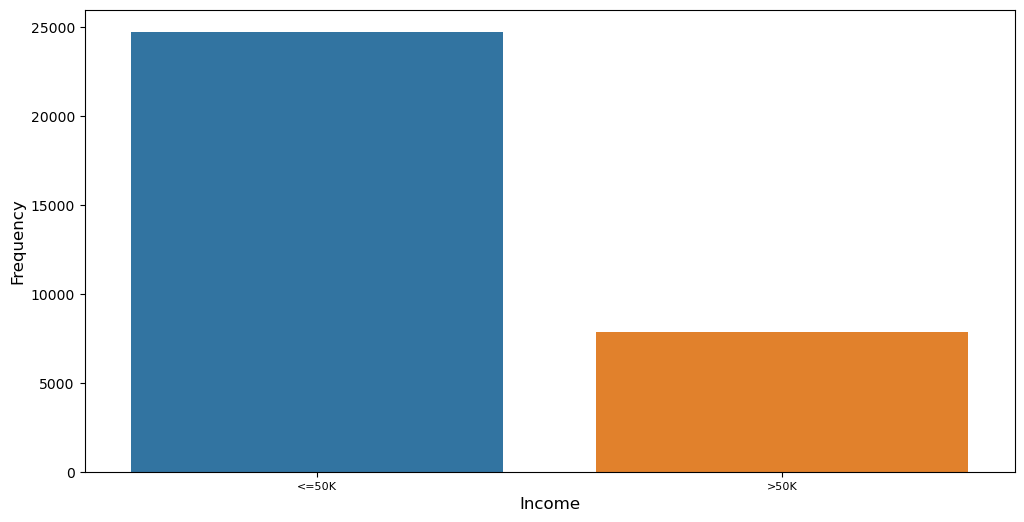

In [72]:
plt.figure(figsize =(12,6));
sns.countplot(x = 'income', data = adult_df);
plt.xlabel("Income",fontsize = 12);
plt.ylabel("Frequency",fontsize = 12);

# Preparing Data for ML Algorithms

In [73]:
print(f"Number of columns before deleting: {adult_df.shape[1]}")

del_cols = ['relationship','education.num']
adult_df.drop(labels = del_cols,axis = 1,inplace = True)
print(f"Number of columns after deleting: {adult_df.shape[1]}")

Number of columns before deleting: 15
Number of columns after deleting: 13


In [74]:
hrs_per_week = adult_df[adult_df['hours.per.week'] == 99]
print("Number of people working for 99 hours per week:", hrs_per_week.shape[0])


Number of people working for 99 hours per week: 85


In [75]:
# drop rows with age 90
print("Number of observation before removing:",adult_df.shape)
index_age = adult_df[adult_df['age'] == 90].index
adult_df.drop(labels = index_age,axis = 0,inplace =True)
print("Number of observation after removing:",adult_df.shape)

Number of observation before removing: (32561, 13)
Number of observation after removing: (32518, 13)


In [76]:
print("Number of observation before removing:",adult_df.shape)
index_gain = adult_df[adult_df['capital.gain'] == 99999].index
adult_df.drop(labels = index_gain,axis = 0,inplace =True)
print("Number of observation after removing:",adult_df.shape)

Number of observation before removing: (32518, 13)
Number of observation after removing: (32359, 13)


In [77]:
num_col_new = ['age','capital.gain', 'capital.loss',
       'hours.per.week','fnlwgt']
cat_col_new = ['workclass', 'education', 'marital.status', 'occupation',
               'race', 'sex', 'native.country', 'income']

In [78]:
from sklearn.pipeline import Pipeline
from sklearn.base import TransformerMixin
from sklearn.preprocessing import MinMaxScaler,StandardScaler
scaler = MinMaxScaler()
pd.DataFrame(scaler.fit_transform(adult_df[num_col_new]),columns = num_col_new).head(3)

,age,capital.gain,capital.loss,hours.per.week,fnlwgt
0,0.915493,0.0,1.000000,0.173469,0.081896
1,0.690141,0.0,1.000000,0.397959,0.118021
2,0.521127,0.0,0.895317,0.397959,0.086982


In [79]:
class DataFrameSelector(TransformerMixin):
    def __init__(self,attribute_names):
        self.attribute_names = attribute_names
                
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        return X[self.attribute_names]
    
    
class num_trans(TransformerMixin):
    def __init__(self):
        pass
    
    def fit(self,X,y=None):
        return self
    
    def transform(self,X):
        df = pd.DataFrame(X)
        df.columns = num_col_new 
        return df
        
    
    
pipeline = Pipeline([('selector',DataFrameSelector(num_col_new)),  
                     ('scaler',MinMaxScaler()),
                    ('transform',num_trans())])



In [80]:
num_df = pipeline.fit_transform(adult_df)
num_df.shape

(32359, 5)

In [81]:
# columns which I don't need after creating dummy variables dataframe
cols = ['workclass_Govt_employess','education_Some-college',
        'marital.status_Never-married','occupation_Other-service',
        'race_Black','sex_Male','income_>50K']

In [82]:
class dummies(TransformerMixin):
    def __init__(self,cols):
        self.cols = cols
    
    def fit(self,X,y = None):
        return self
    
    def transform(self,X):
        df = pd.get_dummies(X)
        df_new = df[df.columns.difference(cols)] 
#difference returns the original columns, with the columns passed as argument removed.
        return df_new

pipeline_cat=Pipeline([('selector',DataFrameSelector(cat_col_new)),
                      ('dummies',dummies(cols))])
cat_df = pipeline_cat.fit_transform(adult_df)
cat_df.shape

(32359, 80)

In [83]:
cat_df['id'] = pd.Series(range(cat_df.shape[0]))
num_df['id'] = pd.Series(range(num_df.shape[0]))

In [84]:
final_df = pd.merge(cat_df,num_df,how = 'inner', on = 'id')
print(f"Number of observations in final dataset: {final_df.shape}")

Number of observations in final dataset: (32157, 86)


# Train and Fine Tuning on the model

In [85]:
y = final_df['income_<=50K']
final_df.drop(labels = ['id','income_<=50K'],axis = 1,inplace = True)
X = final_df

In [86]:
from sklearn.model_selection import train_test_split,cross_val_score,GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,ExtraTreesClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve, auc
from datetime import datetime
from sklearn.feature_selection import RFE

In [87]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size =0.25,random_state = 42)

In [88]:
#Instantiate the classifiers
clf_logreg = LogisticRegression()
clf_tree = DecisionTreeClassifier()
clf_knn =  KNeighborsClassifier()
clf_svc = SVC()
clf_forest = RandomForestClassifier()
clf_ada = AdaBoostClassifier()
clf_bagging = BaggingClassifier()
clf_extratrees = ExtraTreesClassifier()
clf_gnb = GaussianNB()

In [89]:
classifiers = ['LogisticRegression', 'DecisionTree', 'KNN', 'SVC', 'RandomForest', 'Adaboost', 'Bagging', 'Extratrees', 'Naive']

In [90]:
models = {clf_logreg:'LogisticRegression',
          clf_tree:'DecisionTree',
          clf_knn: 'KNN',
          clf_svc: 'SVC',
          clf_forest: 'RandomForest',
          clf_ada: 'Adaboost',
          clf_bagging: 'Bagging',
          clf_extratrees:'Extratrees' ,
          clf_gnb: 'Naive'}

In [91]:
# train function fits the model and returns accuracy score
def train(algo,name,X_train,y_train,X_test,y_test):
    algo.fit(X_train,y_train)
    y_pred = algo.predict(X_test)
    score = accuracy_score(y_test,y_pred)
    print(f"--------------------------------------------{name}---------------------------------------------------")
    print(f"Accuracy Score for {name}: {score*100:.4f}%")
    return y_test,y_pred,score

# acc_res function calculates confusion matrix
def acc_res(y_test,y_pred):
    null_accuracy = y_test.value_counts()[0]/len(y_test)
    print(f"Null Accuracy: {null_accuracy*100:.4f}%")
    print("Confusion Matrix")
    matrix = confusion_matrix(y_test,y_pred)
    print(matrix)
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    TN = matrix[0,0]
    FP = matrix[0,1]
    FN = matrix[1,0]
    TP = matrix[1,1]
    accuracy_score=(TN+TP) / float(TP+TN+FP+FN)
    recall_score = (TP)/ float(TP+FN)
    specificity = TN / float(TN+FP)
    FPR = FP / float(FP+TN)
    precision_score = TP / float(TP+FP)
    print(f"Accuracy Score: {accuracy_score*100:.4f}%")
    print(f"Recall Score: {recall_score*100:.4f}%")
    print(f"Specificity Score: {specificity*100:.4f}%")
    print(f"False Positive Rate: {FPR*100:.4f}%")
    print(f"Precision Score: {precision_score*100:.4f}%")
    print("+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++")
    print("Classification Report")
    print(classification_report(y_test,y_pred))
    
def main(models):
    accuracy_scores = []
    for algo,name in models.items():
        y_test_train,y_pred,acc_score = train(algo,name,X_train,y_train,X_test,y_test)
        acc_res(y_test_train,y_pred)
        accuracy_scores.append(acc_score)
    return accuracy_scores
    
accuracy_scores = main(models)    

C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


--------------------------------------------LogisticRegression---------------------------------------------------
Accuracy Score for LogisticRegression: 84.2164%
Null Accuracy: 23.4950%
Confusion Matrix
[[1044  845]
 [ 424 5727]]
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Accuracy Score: 84.2164%
Recall Score: 93.1068%
Specificity Score: 55.2673%
False Positive Rate: 44.7327%
Precision Score: 87.1424%
+++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++++
Classification Report
              precision    recall  f1-score   support

           0       0.71      0.55      0.62      1889
           1       0.87      0.93      0.90      6151

    accuracy                           0.84      8040
   macro avg       0.79      0.74      0.76      8040
weighted avg       0.83      0.84      0.83      8040

--------------------------------------------DecisionTree---------------------------------------------------
Accuracy Score for DecisionTr

In [92]:
pd.DataFrame(accuracy_scores,columns = ['Accuracy Scores'],index = classifiers).sort_values(by = 'Accuracy Scores',
                                                                                            ascending = False)

,Accuracy Scores
Adaboost,0.852363
LogisticRegression,0.842164
SVC,0.840796
RandomForest,0.838060
Extratrees,0.825746
Bagging,0.822637
KNN,0.810821
DecisionTree,0.798881
Naive,0.305100


In [93]:
models_new = {clf_logreg:'LogisticRegression',        
              clf_forest: 'RandomForest',
              clf_ada: 'Adaboost',
              clf_bagging: 'Bagging'}

classifiers_new = models_new.values()

# K-fold cross validation divides data into k folds and uses k-1 folds for training and k folds for testing. Eventually all the data gets used for training and testing.

In [94]:
mean_score = []
for model,value in models_new.items():
    start_time = datetime.now()
    scores = cross_val_score(model,X_train,y_train,scoring = 'accuracy',cv = 10)
    elapsed_time = datetime.now() - start_time
    print(f"Time taken to complete training {value} model: (hh:mm:ss.ms) {elapsed_time}")
    mean_score.append(scores.mean())

C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

Time taken to complete training LogisticRegression model: (hh:mm:ss.ms) 0:00:06.588655
Time taken to complete training RandomForest model: (hh:mm:ss.ms) 0:00:53.276456
Time taken to complete training Adaboost model: (hh:mm:ss.ms) 0:00:17.621926
Time taken to complete training Bagging model: (hh:mm:ss.ms) 0:00:26.210913


In [95]:
pd.DataFrame(mean_score,index = classifiers_new,
             columns = ['Accuracy Score']).sort_values(by = 'Accuracy Score', ascending = False)

,Accuracy Score
Adaboost,0.853464
LogisticRegression,0.846042
RandomForest,0.834183
Bagging,0.820666


In [96]:
param_grid_logreg = {'C':[0.0001,0.001,0.01,0.1,1,10,100], 'penalty':['l1','l2']}
param_grid_rf = {'n_estimators' : [50,60],
               'max_depth': range(5,16,2)}
param_grid_ada = {'n_estimators':[50,60,70]}
param_grid_bagging = {'n_estimators':[50,60,70]}

In [97]:
def feature_selection(model,X_train,y_train):
    rfe_model = RFE(model)
    rfe_model = rfe_model.fit(X_train,y_train)
    X_train_cols = list(X_train.columns[rfe_model.support_])
    X_train_new = X_train[X_train_cols]
    return X_train_new

def grid(model,parameters,X_train_new):
    grid = GridSearchCV(estimator = model, param_grid = parameters, cv = 10, return_train_score = False,
                        scoring = 'accuracy')
    grid.fit(X_train_new,y_train)
    return grid.best_score_, grid.best_estimator_

def main(model,X_train,y_train,parameters):
    X_train_modi = feature_selection(model,X_train,y_train)
    grid_best_score,grid_best_params = grid(model,parameters,X_train_modi)
    return grid_best_score,grid_best_params,X_train_modi

In [98]:
grid_best_score_logreg, grid_best_params_logreg , X_train_modi_logreg = main(clf_logreg,X_train,y_train,param_grid_logreg)
grid_best_score_rf, grid_best_params_rf , X_train_modi_rf = main(clf_forest,X_train,y_train,param_grid_rf)
grid_best_score_ab, grid_best_params_ab , X_train_modi_ab = main(clf_ada,X_train,y_train,param_grid_ada)
grid_best_score_bc, grid_best_params_bc , X_train_modi_bc = main(clf_ada,X_train,y_train,param_grid_bagging)

C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_

In [99]:
pd.DataFrame([grid_best_score_logreg, grid_best_score_rf,grid_best_score_ab,grid_best_score_bc],
             index = ['LogisticRegression','RandomForest','AdaBoost','Bagging'],
             columns = ['Accuracy Score']).sort_values(by = 'Accuracy Score',ascending  = False)

,Accuracy Score
AdaBoost,0.854501
Bagging,0.854501
RandomForest,0.853215
LogisticRegression,0.844093


In [100]:
print("Number of estimators:",grid_best_params_ab.get_params()['n_estimators'])

Number of estimators: 70


# Label Encoder

In [101]:
from sklearn.preprocessing import LabelEncoder
import pandas as pd

In [105]:
df.tail()

,age,workclass,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,target
32556,27,Private,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,0
32557,40,Private,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,1
32558,58,Private,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,0
32559,22,Private,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,0
32560,52,Self-emp-inc,9,Married-civ-spouse,Exec-managerial,Wife,White,Female,15024,0,40,United-States,1


In [106]:
#Changes does not affect the "data" dataframe
df=data.copy()

In [112]:
df

sex     income
Female  <=50K      9592
        >50K       1179
Male    <=50K     15128
        >50K       6662
Name: income, dtype: int64

# One Hot Encoder

In [139]:
df = pd.read_csv("adult_data.csv")

In [140]:
#Using sklearn

In [141]:
from sklearn.preprocessing import OneHotEncoder

In [142]:
df1=df.copy()

In [143]:
df1

,age,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32557,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32558,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
32559,22,Private,201490,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [144]:
# creating instance of one-hot-encoder
OHE = OneHotEncoder()# Specifies the way unknown categories are handled during transform.

In [145]:
# convert it to array - to columns
enc_df = pd.DataFrame(OHE.fit_transform(df1[['workclass']]).toarray())

In [146]:
enc_df

,0,1,2,3,4,5,6,7,8
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...
32556,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32557,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32558,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32559,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [150]:
# merge with main df
data_final = df1.iloc[:,0:4].join(enc_df)
data_final

,age,workclass,fnlwgt,education,0,1,2,3,4,5,6,7,8
0,39,State-gov,77516,Bachelors,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,50,Self-emp-not-inc,83311,Bachelors,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
2,38,Private,215646,HS-grad,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,53,Private,234721,11th,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,28,Private,338409,Bachelors,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,27,Private,257302,Assoc-acdm,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32557,40,Private,154374,HS-grad,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32558,58,Private,151910,HS-grad,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
32559,22,Private,201490,HS-grad,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


# Using Pandas

In [151]:
import pandas as pd

In [152]:
#df2 =pd.read_csv("adult_data.csv",index_col=0)
df2=data.copy()

In [153]:
data_encoded=pd.get_dummies(df2)

In [154]:
data_encoded

1179   6662   9592   15128
sex    income                            
Female <=50K       0      0      1      0
       >50K        1      0      0      0
Male   <=50K       0      0      0      1
       >50K        0      1      0      0

# IsolationForest

In [156]:
# Isolation Forest example - useful for anomaly detection along with outliers
from sklearn.ensemble import IsolationForest
import pandas as pd

In [157]:
df=pd.DataFrame({
      'Marks':[50,80,82,95,800],
      'Time':[1,2,3,1.5,60]
})
df

,Marks,Time
0,50,1.0
1,80,2.0
2,82,3.0
3,95,1.5
4,800,60.0


In [158]:
# what is outlier here?
#iso=IsolationForest(random_state=10)# expecting 10 % outlier in dataset
iso=IsolationForest(random_state=10,contamination=0.1)
iso.fit(df)
out=iso.predict(df)

C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


In [159]:
out # -1: outlier - last value is an outlier

array([ 1,  1,  1,  1, -1])

In [160]:
df['Score']=out
df

,Marks,Time,Score
0,50,1.0,1
1,80,2.0,1
2,82,3.0,1
3,95,1.5,1
4,800,60.0,-1


In [161]:
data =pd.read_csv("adult_data.csv",index_col=0)
data_encoded=pd.get_dummies(data)

In [162]:
data_encoded

,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_<=50K,income_>50K
age,,,,,,,,,,,,,,,,,,,,,
39,77516,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
50,83311,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
38,215646,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
53,234721,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
28,338409,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,257302,12,0,0,38,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
40,154374,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
58,151910,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [163]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
# contamination: how much percentage of outliers you are expecting in dataset
# eg. in health care domain it will be very low (1% or less) 0.01 or 0.001
clf.fit(data_encoded)

C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


IsolationForest(contamination=0.01, random_state=10)

In [164]:
# predictions
y_pred_outliers = clf.predict(data_encoded)

In [165]:
#-1 for outliers and 1 for inliers.
y_pred_outliers

array([1, 1, 1, ..., 1, 1, 1])

In [166]:
data_encoded

,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass_?,workclass_Federal-gov,workclass_Local-gov,workclass_Never-worked,workclass_Private,...,native_country_Scotland,native_country_South,native_country_Taiwan,native_country_Thailand,native_country_Trinadad&Tobago,native_country_United-States,native_country_Vietnam,native_country_Yugoslavia,income_<=50K,income_>50K
age,,,,,,,,,,,,,,,,,,,,,
39,77516,13,2174,0,40,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
50,83311,13,0,0,13,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
38,215646,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
53,234721,7,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
28,338409,13,0,0,40,0,0,0,0,1,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27,257302,12,0,0,38,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0
40,154374,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,1
58,151910,9,0,0,40,0,0,0,0,1,...,0,0,0,0,0,1,0,0,1,0


In [170]:
# training the model
clf = IsolationForest(random_state=10,contamination=.01)
clf.fit(data_encoded)
# predictions
y_pred_outliers = clf.predict(data_encoded)
y_pred_outliers # last has -1 so its an outlier

C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but IsolationForest was fitted with feature names
  warnings.warn(


array([1, 1, 1, ..., 1, 1, 1])

# PPS score

In [175]:
#install the package
!pip install ppscore

In [176]:
import ppscore as pps

In [177]:
data.head()

,workclass,fnlwgt,education,education_num,marital_status,occupation,relationship,race,sex,capital_gain,capital_loss,hours_per_week,native_country,income
age,,,,,,,,,,,,,,
39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [179]:
# Syntax: pps.score(df, "feature_column", "target_column")
pps.score(data, "fnlwgt", "education_num") # ppscore:0.55 so ok kind of score

{'x': 'fnlwgt',
 'y': 'education_num',
 'ppscore': 0,
 'case': 'regression',
 'is_valid_score': True,
 'metric': 'mean absolute error',
 'baseline_score': 1.853,
 'model_score': 2.6589666666666663,
 'model': DecisionTreeRegressor()}

In [180]:
#calculate the whole PPS matrix
pps.matrix(data)# petal width with species is most imp varaible with pps score 0.9276

C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\s

C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\s

,x,y,ppscore,case,is_valid_score,metric,baseline_score,model_score,model
0,workclass,workclass,1.0,predict_itself,True,None,0.000000,1.000000,None
1,workclass,fnlwgt,0.0,regression,True,mean absolute error,75872.186200,76520.110374,DecisionTreeRegressor()
2,workclass,education,0.0,classification,True,weighted F1,0.201200,0.194255,DecisionTreeClassifier()
3,workclass,education_num,0.0,regression,True,mean absolute error,1.853000,1.875083,DecisionTreeRegressor()
4,workclass,marital_status,0.0,classification,True,weighted F1,0.343600,0.298529,DecisionTreeClassifier()
...,...,...,...,...,...,...,...,...,...
191,income,capital_gain,0.0,regression,True,mean absolute error,1093.884000,1760.682115,DecisionTreeRegressor()
192,income,capital_loss,0.0,regression,True,mean absolute error,94.942600,176.261353,DecisionTreeRegressor()
193,income,hours_per_week,0.0,regression,True,mean absolute error,7.656400,8.097596,DecisionTreeRegressor()
194,income,native_country,0.0,classification,True,weighted F1,0.841082,0.841082,DecisionTreeClassifier()


In [181]:
df=pd.DataFrame(pps.matrix(data))
df[df.case!='predict_itself'].iloc[:,[0,1,2,3,5,8]].sort_values('ppscore',ascending=False)
# PPScore is highest in petal.width and species i.e. 0.927652 i.e. petal width is very good feature in predicting species

C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\s

C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\site-packages\sklearn\model_selection\_split.py:700: UserWarning: The least populated class in y has only 2 members, which is less than n_splits=4.
  warnings.warn(
C:\Users\Kajal\anaconda3\lib\s

,x,y,ppscore,case,metric,model
44,education_num,education,1.000000,classification,weighted F1,DecisionTreeClassifier()
31,education,education_num,1.000000,regression,mean absolute error,DecisionTreeRegressor()
88,relationship,marital_status,0.636535,classification,weighted F1,DecisionTreeClassifier()
92,relationship,sex,0.400980,classification,weighted F1,DecisionTreeClassifier()
62,marital_status,relationship,0.377125,classification,weighted F1,DecisionTreeClassifier()
...,...,...,...,...,...,...
79,occupation,capital_gain,0.000000,regression,mean absolute error,DecisionTreeRegressor()
71,occupation,fnlwgt,0.000000,regression,mean absolute error,DecisionTreeRegressor()
69,marital_status,income,0.000000,classification,weighted F1,DecisionTreeClassifier()
68,marital_status,native_country,0.000000,classification,weighted F1,DecisionTreeClassifier()
